Initialization

In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

#makes matplotlib use jupyter's backend
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt


PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Getting the Data

In [2]:
import pandas as pd

HOUSING_PATH = os.path.join("datasets","housing")

# Returns a DataFrame object with all the data
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

Plot and Analyze the Data

In [3]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


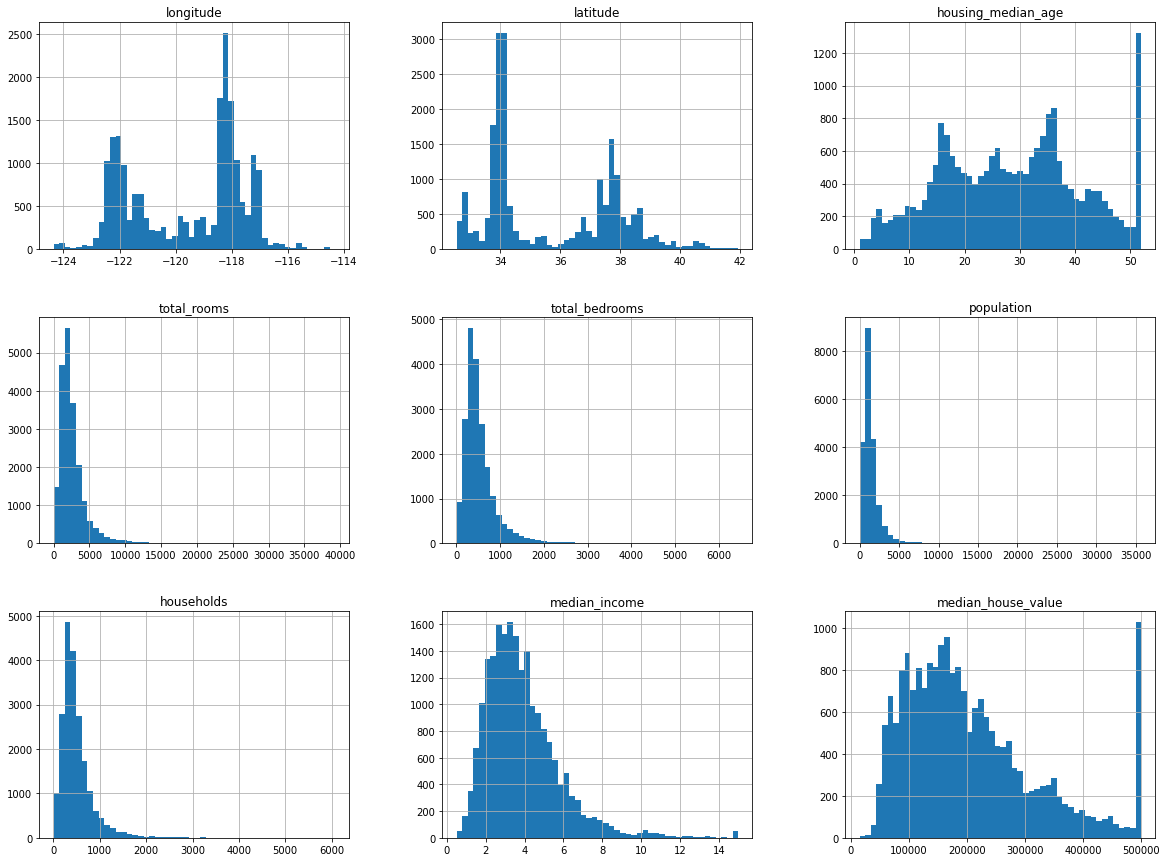

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt

housing.hist(bins=50,figsize=(20,15))
plt.show()

Split income into categories because some bins are too small.

<AxesSubplot:>

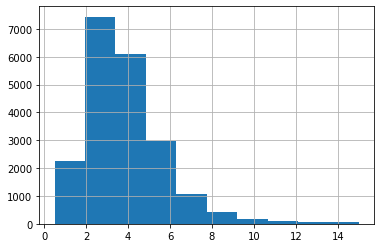

In [7]:
housing["median_income"].hist()

<AxesSubplot:>

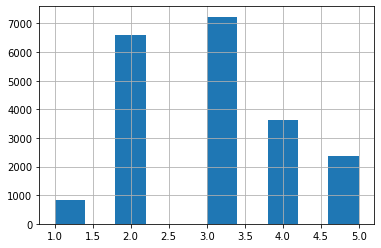

In [8]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                               labels = [1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=.2)

for train_index, test_index in sss.split(housing, housing["income_cat"]):
    train_set = housing.loc[train_index]
    test_set = housing.loc[test_index]

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

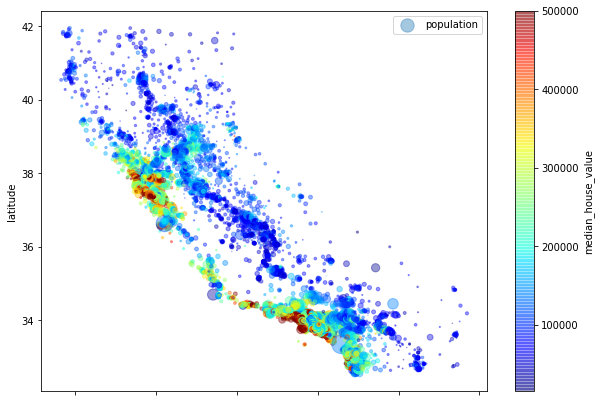

In [10]:
housing.plot(x="longitude", y="latitude", kind="scatter",
             s=housing["population"]/100, label="population",
             c="median_house_value", figsize=(10,7),
             cmap=plt.get_cmap("jet"),
             alpha=0.4
)

In [11]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

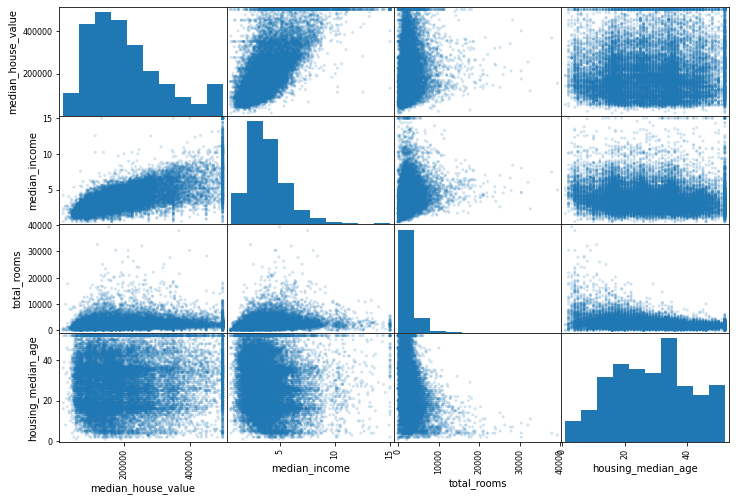

In [12]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
pd.plotting.scatter_matrix(housing[attributes], alpha=0.2, figsize=(12,8))

# Prepare the Data for Machine Learning

In [13]:
train_set = train_set.drop(["median_income"],axis=1)
test_set = test_set.drop(["median_income"],axis=1)
housing = train_set.drop(["median_house_value"], axis=1)
housing_labels = train_set["median_house_value"]

In [14]:
from sklearn.impute import SimpleImputer

housing_num = housing.drop("ocean_proximity",axis=1)

imputer = SimpleImputer()
X = imputer.fit_transform(housing_num)
housing_num = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 9269 to 12643
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   income_cat          16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [15]:
from sklearn.preprocessing import OneHotEncoder

housing_cat = housing[["ocean_proximity"]]

enc = OneHotEncoder()
housing_cat_1hot = enc.fit_transform(housing_cat)
housing_cat = housing_cat_1hot.toarray()

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        return np.c_[X, rooms_per_household, population_per_household]

cmbAttAdder = CombinedAttributeAdder()
housing_added_attributes = cmbAttAdder.fit_transform(housing.values)
housing_added_attributes

array([[-122.54, 38.14, 16.0, ..., 5, 7.033333333333333,
        2.6333333333333333],
       [-117.1, 32.69, 11.0, ..., 1, 3.9677002583979326,
        3.6330749354005167],
       [-118.29, 34.17, 17.0, ..., 2, 3.879154078549849,
        3.0070493454179257],
       ...,
       [-117.91, 33.83, 47.0, ..., 3, 4.623853211009174,
        3.4403669724770642],
       [-122.36, 37.92, 52.0, ..., 1, 5.0, 2.9302325581395348],
       [-121.46, 38.53, 37.0, ..., 2, 4.93705035971223,
        2.8902877697841727]], dtype=object)

In [17]:
housing_added_attributes = pd.DataFrame(housing_added_attributes,
                                        columns=list(housing.columns) + ["rooms_per_household","population_per_household"],
                                        index=housing.index
                                       )
housing_added_attributes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,ocean_proximity,income_cat,rooms_per_household,population_per_household
9269,-122.54,38.14,16.0,4431.0,603.0,1659.0,630.0,NEAR BAY,5,7.033333,2.633333
14243,-117.1,32.69,11.0,3071.0,911.0,2812.0,774.0,NEAR OCEAN,1,3.9677,3.633075
5759,-118.29,34.17,17.0,3852.0,1066.0,2986.0,993.0,<1H OCEAN,2,3.879154,3.007049
3236,-119.58,36.1,21.0,1382.0,327.0,1469.0,355.0,INLAND,1,3.892958,4.138028
12255,-117.02,33.76,20.0,1317.0,203.0,453.0,158.0,INLAND,2,8.335443,2.867089
...,...,...,...,...,...,...,...,...,...,...,...
12881,-121.34,38.68,28.0,3379.0,552.0,1543.0,556.0,INLAND,3,6.077338,2.77518
15226,-117.24,33.05,15.0,3029.0,555.0,1559.0,546.0,NEAR OCEAN,4,5.547619,2.855311
11204,-117.91,33.83,47.0,504.0,113.0,375.0,109.0,<1H OCEAN,3,4.623853,3.440367
1802,-122.36,37.92,52.0,215.0,41.0,126.0,43.0,NEAR BAY,1,5.0,2.930233


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('combined_attribs_adder', CombinedAttributeAdder()),
    ('standard_scaler', StandardScaler())
]) 
cat_pipeline = Pipeline([
    ('one_hot_encoder', OneHotEncoder())
])

num_attribs = list(housing_num.columns)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.48602948,  1.17793941, -1.0041049 , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.23672395, -1.38007602, -1.40093263, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.64112164, -0.68542229, -0.92473935, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.83131397, -0.8450049 ,  1.45622704, ...,  0.        ,
         0.        ,  0.        ],
       [-1.39593837,  1.07468007,  1.85305477, ...,  0.        ,
         1.        ,  0.        ],
       [-0.94548284,  1.36099006,  0.66257157, ...,  0.        ,
         0.        ,  0.        ]])

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
housing_predictions_lin = lin_reg.predict(housing_prepared)
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores.mean()

73723.02318779982

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score


tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions_tree = tree_reg.predict(housing_prepared)
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
tree_rmse_scores.mean()

70228.55984101814

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18825.416965699886

In [22]:
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

lin_final_predictions = lin_reg.predict(X_test_prepared)
tree_final_predictions = tree_reg.predict(X_test_prepared)
forest_final_predictions = forest_reg.predict(X_test_prepared)


lin_final_mse = mean_squared_error(y_test, lin_final_predictions)
tree_final_mse = mean_squared_error(y_test, tree_final_predictions)
forest_final_mse = mean_squared_error(y_test, forest_final_predictions)

lin_final_rmse = np.sqrt(lin_final_mse)
tree_final_rmse = np.sqrt(tree_final_mse)
forest_final_rmse = np.sqrt(forest_final_mse)

print("Final model scores (RMSE)")
print("linear:", lin_final_rmse)
print("tree:", tree_final_rmse)
print("forest:", forest_final_rmse)

Final model scores (RMSE)
linear: 73197.35991088704
tree: 69369.52144823315
forest: 49057.28790029208
